In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2, Xception
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.regularizers import l2


# utility libraries
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_xception.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.3
best_batch_size	= 32
best_epochs	= 15


base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = BatchNormalization()(base_model.output) # JUST ADDED
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(best_dropout)(x)

# final softmax probabilistic classification layer - JUST ADDED L2
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax', kernel_regularizer=l2(0.01))(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# JUST ADDED: get init accuracy before training
initial_loss_val, initial_accuracy_val = model.evaluate(VAL_GENERATOR)
initial_loss_train, initial_accuracy_train = model.evaluate(TRAIN_GENERATOR)

print("Metrics Before Training:")
print(f" - Training   -> Loss: {initial_loss_train:.4f}, Accuracy: {initial_accuracy_train:.4f}")
print(f" - Validation -> Loss: {initial_loss_val:.4f}, Accuracy: {initial_accuracy_val:.4f}")

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)

# append intial values for plotting
history.history['accuracy'].insert(0, initial_accuracy_train) #training
history.history['loss'].insert(0, initial_loss_train)  # training

history.history['val_accuracy'].insert(0, initial_accuracy_val)  # validation
history.history['val_loss'].insert(0, initial_loss_val)  # validation




/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 6102 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.


/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 553ms/step - accuracy: 0.0717 - loss: 2.7731
191/191 ━━━━━━━━━━━━━━━━━━━━ 109s 571ms/step - accuracy: 0.0532 - loss: 2.7328
Metrics Before Training:
 - Training   -> Loss: 2.7409, Accuracy: 0.0515
 - Validation -> Loss: 2.7623, Accuracy: 0.0659
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 117s 607ms/step - accuracy: 0.5453 - loss: 1.6024 - val_accuracy: 0.6841 - val_loss: 1.1575
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 115s 601ms/step - accuracy: 0.8236 - loss: 0.7777 - val_accuracy: 0.6909 - val_loss: 1.0890
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 114s 599ms/step - accuracy: 0.8759 - loss: 0.6468 - val_accuracy: 0.6886 - val_loss: 1.0684
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 114s 595ms/step - accuracy: 0.9014 - loss: 0.5665 - val_accuracy: 0.6705 - val_loss: 1.0773
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 115s 604ms/step - accuracy: 0.9062 - loss: 0.5353 - val_accuracy: 0.7182 - val_loss: 1.0585
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 120s 626ms/step - accurac

# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 572ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.647059,0.825000,0.725275,40.000000
american_house_spider,0.828571,0.725000,0.773333,40.000000
bedbug,0.585366,0.600000,0.592593,40.000000
brown_stink_bug,0.780488,0.800000,0.790123,40.000000
carpenter_ant,0.675000,0.675000,0.675000,40.000000
cellar_spider,0.833333,0.750000,0.789474,40.000000
flea,0.447368,0.425000,0.435897,40.000000
house_centipede,0.880952,0.925000,0.902439,40.000000
silverfish,0.750000,0.750000,0.750000,40.000000
subterranean_termite,0.735294,0.625000,0.675676,40.000000


<Figure size 800x600 with 0 Axes>

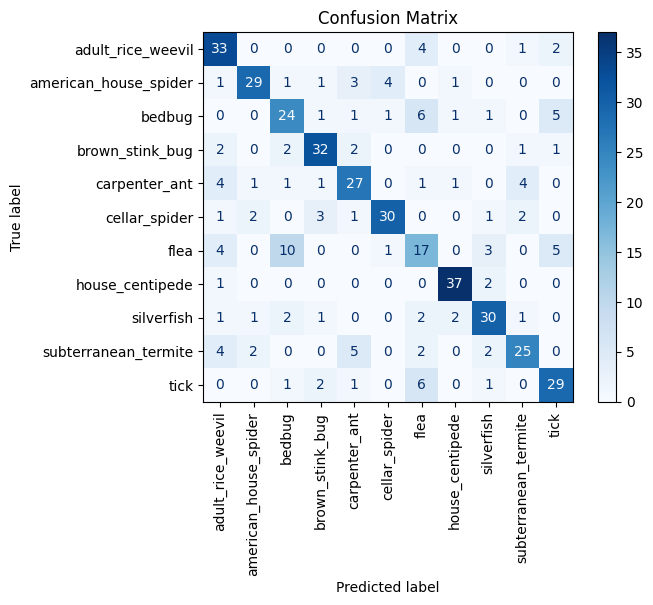

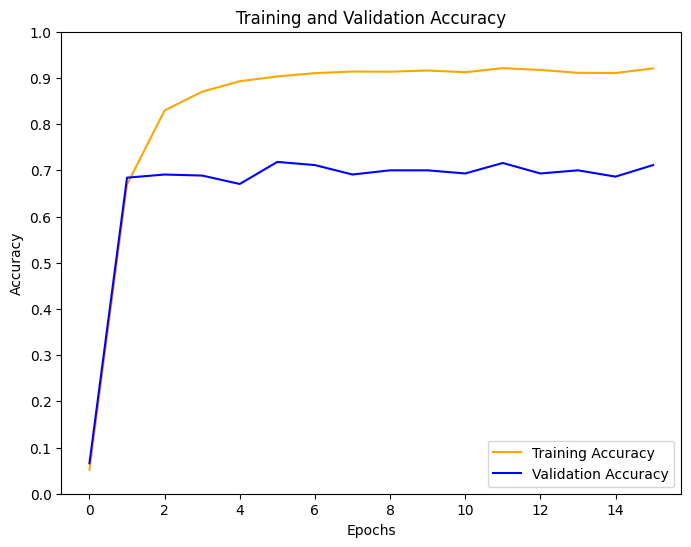

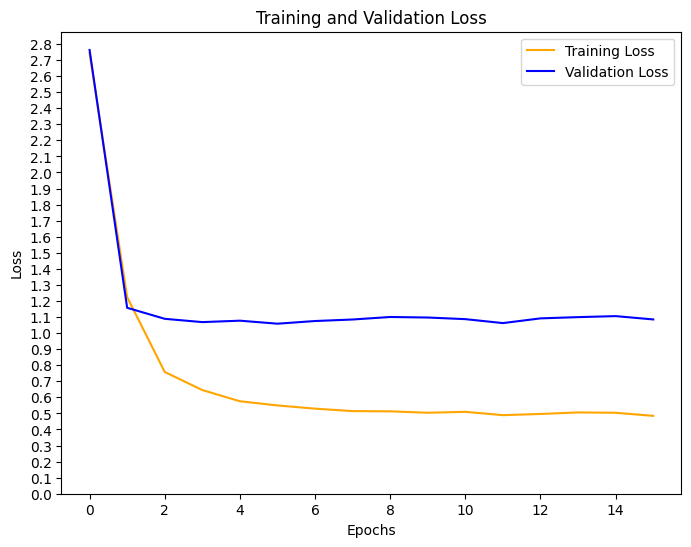

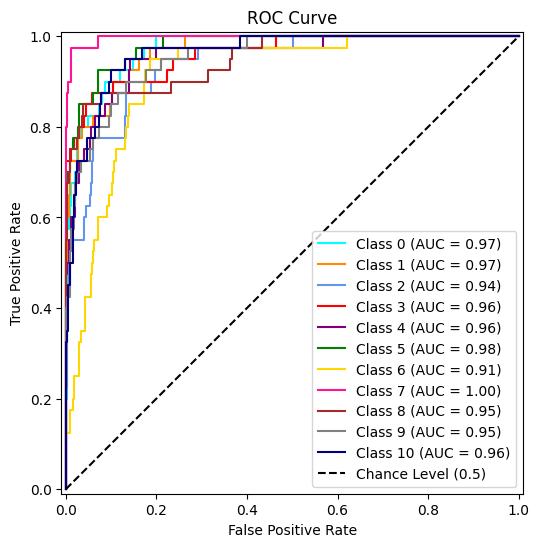

Macro-averaged One-vs-Rest ROC AUC score: 0.96
Accuracy: 0.711
Precision: 0.714
Recall: 0.711
F1 Score: 0.711


{'accuracy': 0.711,
 'precision': 0.714,
 'recall': 0.711,
 'f1_score': 0.711,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.647059  0.825000  0.725275   40.000000
 american_house_spider   0.828571  0.725000  0.773333   40.000000
 bedbug                  0.585366  0.600000  0.592593   40.000000
 brown_stink_bug         0.780488  0.800000  0.790123   40.000000
 carpenter_ant           0.675000  0.675000  0.675000   40.000000
 cellar_spider           0.833333  0.750000  0.789474   40.000000
 flea                    0.447368  0.425000  0.435897   40.000000
 house_centipede         0.880952  0.925000  0.902439   40.000000
 silverfish              0.750000  0.750000  0.750000   40.000000
 subterranean_termite    0.735294  0.625000  0.675676   40.000000
 tick                    0.690476  0.725000  0.707317   40.000000
 accuracy                0.711364  0.711364  0.711364    0.711364
 macro avg               0.713992  

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Xception validation metrics: 'accuracy': 0.711,'precision': 0.714,'recall': 0.711,'f1_score': 0.711

# Test plots

/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.666667,0.700000,0.682927,20.000000
american_house_spider,0.842105,0.800000,0.820513,20.000000
bedbug,0.391304,0.450000,0.418605,20.000000
brown_stink_bug,0.750000,0.750000,0.750000,20.000000
carpenter_ant,0.666667,0.800000,0.727273,20.000000
cellar_spider,0.947368,0.900000,0.923077,20.000000
flea,0.416667,0.500000,0.454545,20.000000
house_centipede,0.944444,0.850000,0.894737,20.000000
silverfish,0.866667,0.650000,0.742857,20.000000
subterranean_termite,0.714286,0.500000,0.588235,20.000000


<Figure size 800x600 with 0 Axes>

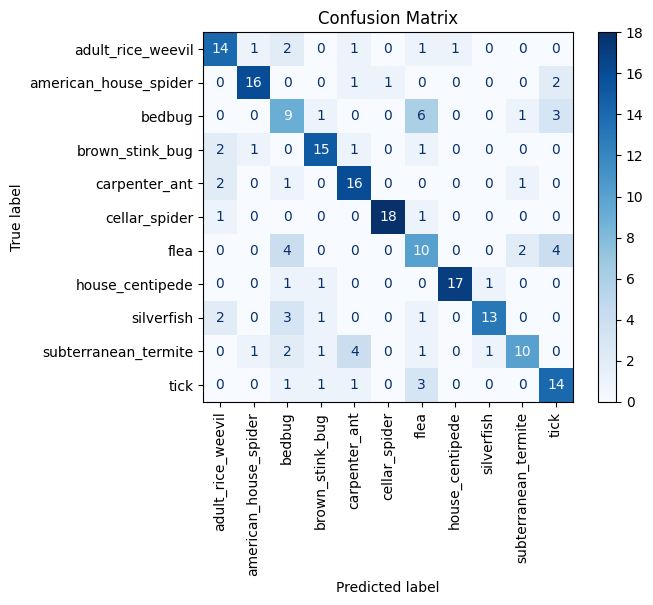

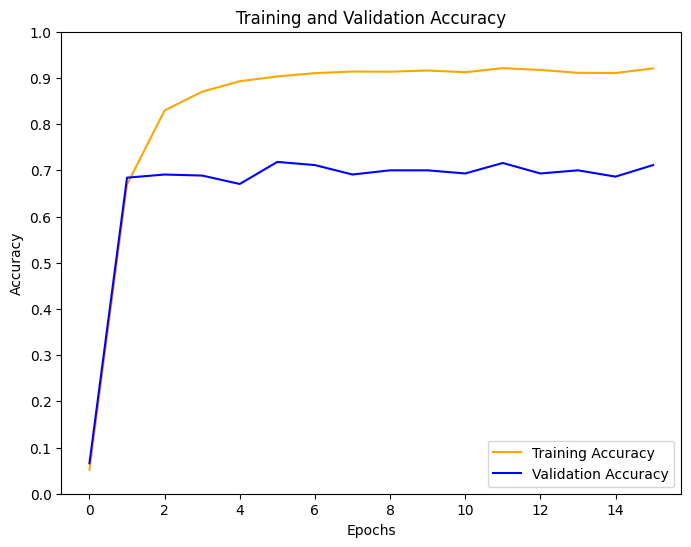

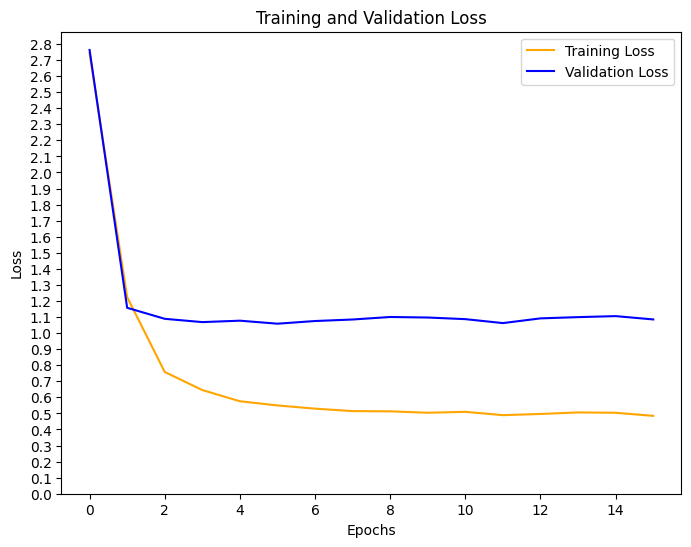

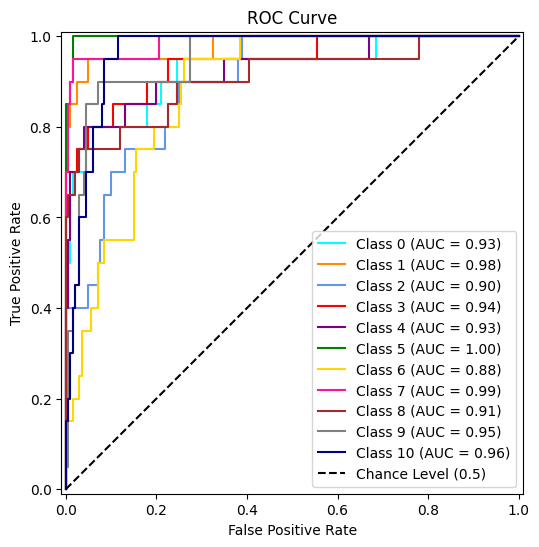

Macro-averaged One-vs-Rest ROC AUC score: 0.94
Accuracy: 0.691
Precision: 0.71
Recall: 0.691
F1 Score: 0.696


{'accuracy': 0.691,
 'precision': 0.71,
 'recall': 0.691,
 'f1_score': 0.696,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.666667  0.700000  0.682927   20.000000
 american_house_spider   0.842105  0.800000  0.820513   20.000000
 bedbug                  0.391304  0.450000  0.418605   20.000000
 brown_stink_bug         0.750000  0.750000  0.750000   20.000000
 carpenter_ant           0.666667  0.800000  0.727273   20.000000
 cellar_spider           0.947368  0.900000  0.923077   20.000000
 flea                    0.416667  0.500000  0.454545   20.000000
 house_centipede         0.944444  0.850000  0.894737   20.000000
 silverfish              0.866667  0.650000  0.742857   20.000000
 subterranean_termite    0.714286  0.500000  0.588235   20.000000
 tick                    0.608696  0.700000  0.651163   20.000000
 accuracy                0.690909  0.690909  0.690909    0.690909
 macro avg               0.710443  0

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Xception test metrics: 'accuracy': 0.691, 'precision': 0.71,'recall': 0.691, 'f1_score': 0.696